In [1]:
import numpy as np
import cv2

In [2]:
image = cv2.imread("digits1.png")

In [3]:
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [4]:
divisions = list(np.hsplit(i,100) for i in np.vsplit(gray_img,50))

In [5]:
NP_array = np.array(divisions)

In [6]:
train_data = NP_array[:,:50].reshape(-1,400).astype(np.float32)

In [7]:
test_data = NP_array[:,50:100].reshape(-1,400).astype(np.float32)

In [8]:
from PIL import Image

In [9]:
image = Image.open("digits1.png")

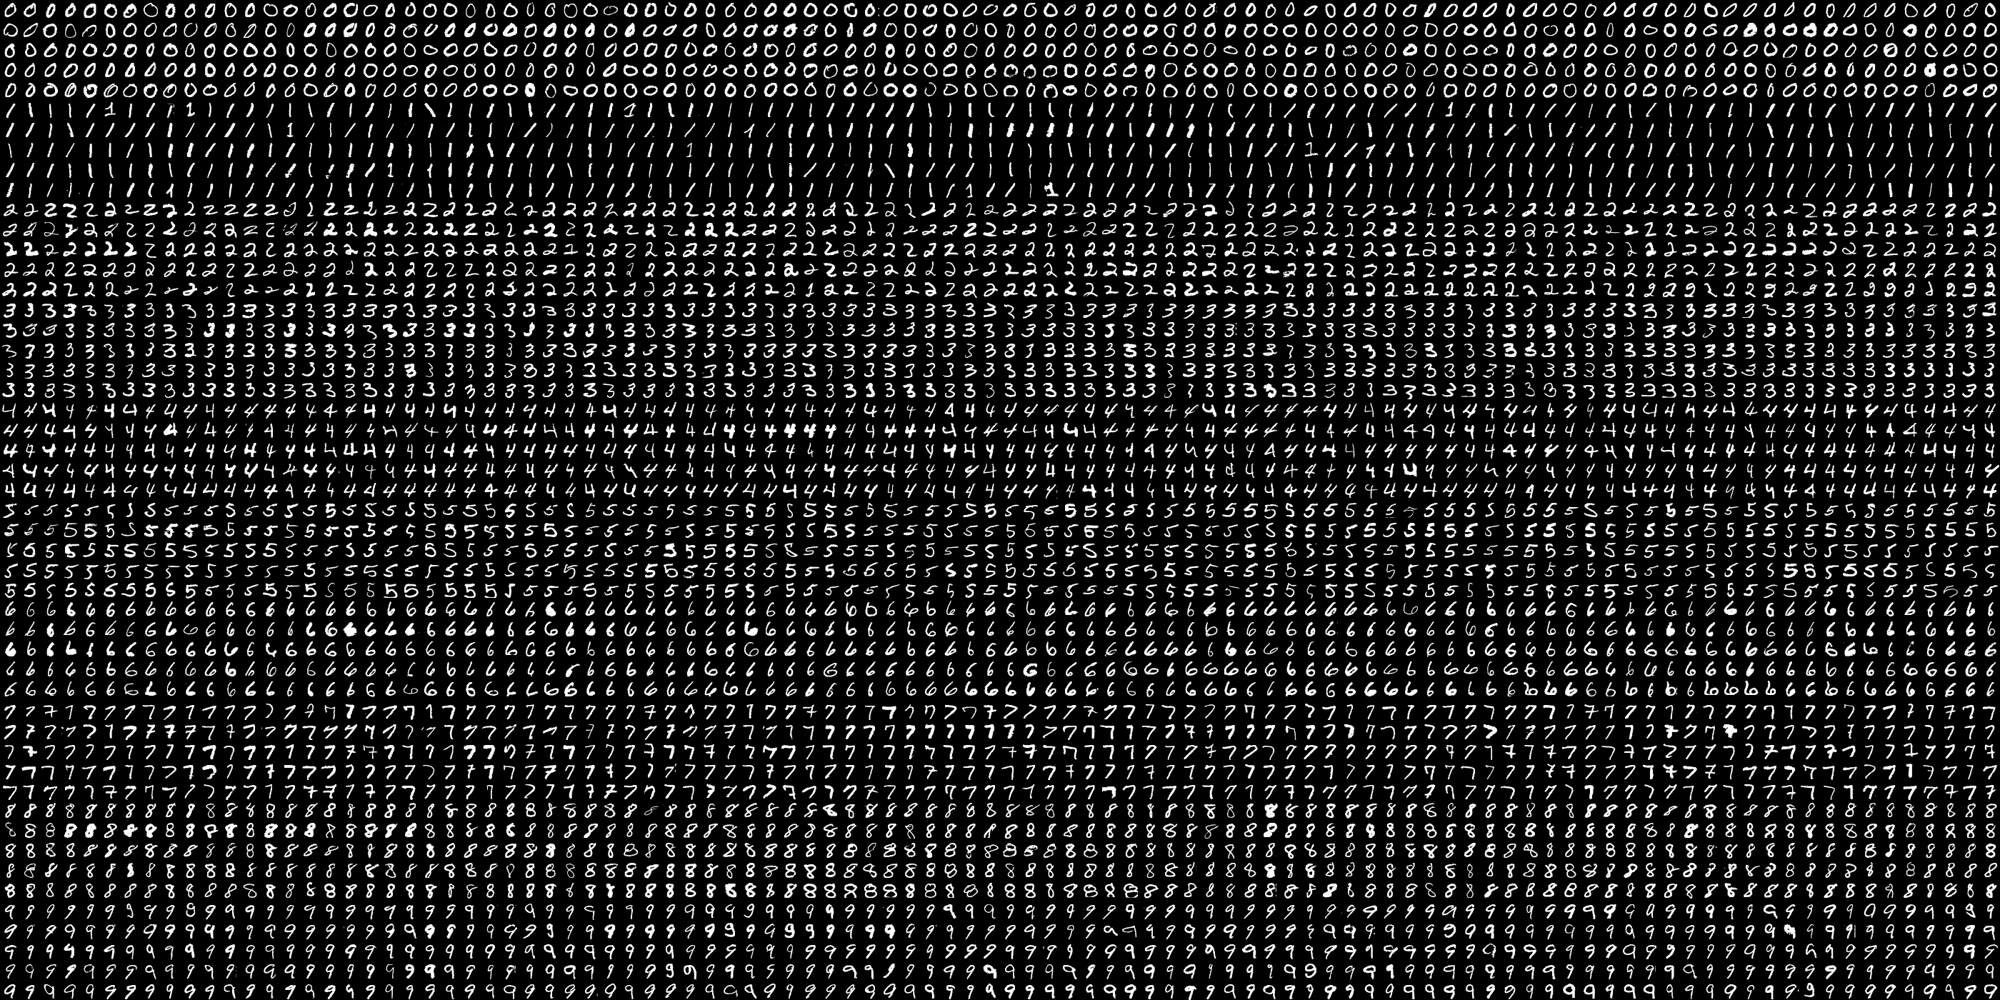

In [10]:
image

In [11]:
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]

In [12]:
test_labels = np.repeat(k,250)[:,np.newaxis]

In [13]:
knn = cv2.ml.KNearest_create()

In [14]:
knn.train(train_data,cv2.ml.ROW_SAMPLE,train_labels)

True

In [15]:
ret, output, neighbours, distance = knn.findNearest(test_data,k=3)

In [16]:
matched = output==test_labels
correct_OP = np.count_nonzero(matched)

In [17]:
accuracy = (correct_OP*100)/(output.size)

In [18]:
accuracy

91.64